# Applications of Derivatives
In this notebook, I explore the various applications of derivatives including:
- Graphing functions
- Identifying absolute maxima & minima
- Identifying local maxima & minima
- Concavity & Convexity
- Basic optimization
<br>
For implementations of numerical derivative and limit calculations, see the .cpp files in this directory.

In [99]:
# Notebook Imports
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

To start, we begin by defining the function:<br>
$f(x)=-x^5+x$<br>
I chose this funtion because it produces a nice cubic S-shaped curve on a relatively narrow interval.

In [100]:
def f(x):
    """ Function f(x) """
    return -(x ** 5) + (10 * x)

To compute the derivative of the function f(x), the numerical method used is the central difference approximation. Given a small change in x (x + h, where h is a small number), the central difference approximation takes the average of the equally spaced points around the central point. This method leads to a more accurate appoximation than that of the forward or backward approximation methods. It also converges faster than both numerical methods, as explored in numerical_derivatives.cpp.<br>
The central difference approximation is given by:<br><br>
$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$

In [101]:
def f_prime(x, h=0.001):
    """ Central difference approximation """
    return (f(x + h) - f(x - h)) / (2*h)

In [102]:
def f_double_prime(x, h=0.001):
    """ Central difference for the second derivative """
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)

In [103]:
# Compute the function values on the interval
x = np.linspace(-2, 2, 1000)
y = f(x)

# Compute the derivative function on the interval
d_dx = f_prime(x)

### 1. Graphing Function & Derivatives
The first exploration graphs the function values and the derivative function values over the interval [-2, 2]. As we can see, the function is in the 5th degree, and the derivative function a degree less the 4th degree (although harder to see). The derivative function shows where the function is increasing and decreasing, as well as the critical points marking where changes occur.

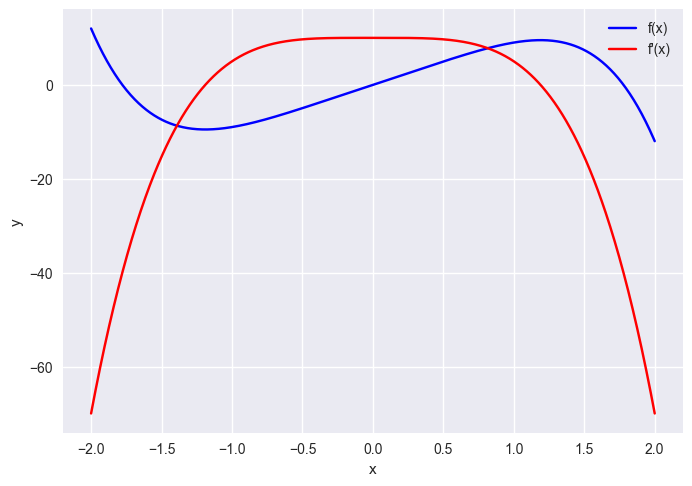

In [104]:
# Plot f(x) and f'(x)
plt.plot(x, y, c='b', label='f(x)')
plt.plot(x, d_dx, c='r', label="f'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Absolute Maxima & Minima
Next we continue by finding the absolute maxima and minima of f(x). A straight forward way of determining these absolute extreme values is using the built in man and min functions. One consideration when using this method is the sample rate of the function. A function with a lower sampled frequency will have increased error in its estimates of the maxima and minima. In other words, the estimates will not equal the true values.

In [105]:
# Fund the absolute extreme values
abs_maxima = max(y)
abs_minima = min(y)

# On the interval
print(f"Absolute maxima: {abs_maxima:.4f}")
print(f"Absolute minima: {abs_minima:.4f}")

Absolute maxima: 12.0000
Absolute minima: -12.0000


### 3. Local Maxima & Minima
To continue our investigation into applications of the derivative, we shift from absolute to local maxima and minima. Local maxima and minima are points on the graph there the sign of f'(x) changes sign. For a critical point c, $f'(c)=0$ is a candiate for the local maxima/minima. The signs of f'(c) must be different on each side.

In [106]:
critical_points = []

# Locate the critical points (looking for a change in sign)
for i in range(1, len(x)):
    # Find change in f'(x)
    if d_dx[i-1] * d_dx[i] < 0:
        cp = (x[i-1] + x[i]) / 2
        critical_points.append(cp)

print(critical_points)

[np.float64(-1.1891891891891893), np.float64(1.1891891891891893)]


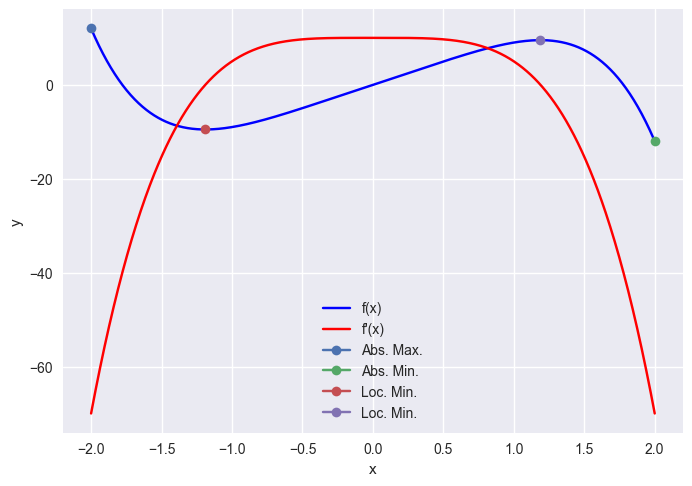

In [107]:
# critical_points[0] = local minima
# critical_points[1] = local maxima
loc_min = critical_points[0]
loc_max = critical_points[1]

# Plot f(x), f'(x), absolute maxima/minma, local maxima/minima
plt.plot(x, y, c='b', label='f(x)')
plt.plot(x, d_dx, c='r', label="f'(x)")
plt.plot(-2, abs_maxima, marker='o', label='Abs. Max.') # Hard coded lower bound
plt.plot(2, abs_minima, marker='o', label='Abs. Min.')  # Hard coded upper bound
plt.plot(loc_min, f(loc_min), marker='o', label='Loc. Min.')
plt.plot(loc_max, f(loc_max), marker='o', label='Loc. Min.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 4. Concavity & Convexity
Concavity and convexity measure the curvature of the function. Given the critical points of the function (measured above), we use the second derivative to determine whether the graph is convex or concave on an interval. To start, the graphs of f(x), f'(x), f''(x) are shown. We know that the critical points are about +/- 1.189.

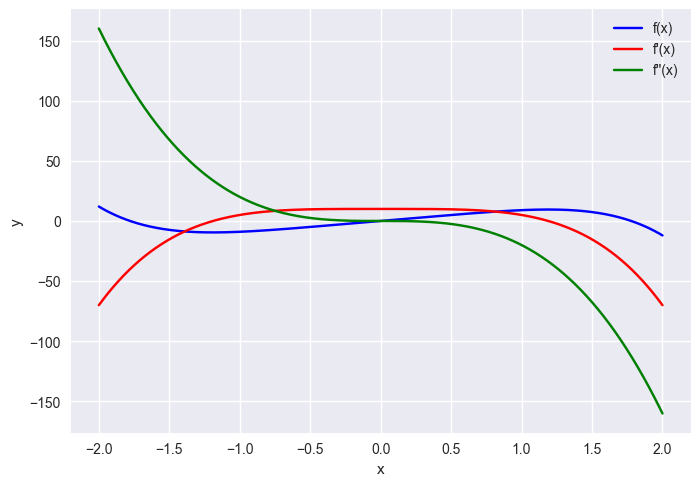

In [108]:
# Compute the second derivative
d2_dx2 = f_double_prime(x)

# Plot f(x), f'(x), f''(x)
plt.plot(x, y, c='b', label='f(x)')
plt.plot(x, d_dx, c='r', label="f'(x)")
plt.plot(x, d2_dx2, c='g', label="f''(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

To determine the intervals where the function is concave and convex, we use the properties of the second derivative.<br>
1. If $f''>0$, then the function is convex on the interval
2. If $f''<0$, then the function is concave on the interval

In [109]:
# Obtain the concave and convex intervals for f
convex_I = x[np.where(d2_dx2 > 0)]
concave_I = x[np.where(d2_dx2 < 0)]

convex_I_endpoints = (convex_I[0], convex_I[-1])
concave_I_endpoints = (concave_I[0], concave_I[-1])

print(f"Convex Interval: [{convex_I_endpoints[0]:.2f}, {convex_I_endpoints[1]:.2f}]")
print(f"Concave Interval: [{concave_I_endpoints[0]:.2f}, {concave_I_endpoints[1]:.2f}]")

Convex Interval: [-2.00, -0.00]
Concave Interval: [0.00, 2.00]


The function is convex on the interval [-2, 0] and concave on the interval [0, 2]. Its important to note that there is a small sampling error built into the interval (hence the negative 0). The values of x are not continuous.